In [74]:
import warnings
warnings.filterwarnings('ignore')

# Basic Statistics 1:
## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

### Objective

* To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


## Descriptive Analysis for Numerical Columns

### Objective
* To compute and analyze basic statistical measures for numerical columns in the dataset.

#### Step 1: Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

In [75]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [76]:
df = pd.read_csv('./sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


#### Step 2: Identify numerical columns in the dataset.

In [77]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [78]:
numcol = df.select_dtypes(include=['float64', 'int64'])
numcol

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


#### Step 3: Calculate the mean, median, mode, and standard deviation for these columns.

In [79]:
numcol.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [80]:
import numpy as np
from scipy import stats

In [81]:
descriptive = []
for i in numcol.columns:
    descriptive.append({
        'mean' : round(np.mean(numcol[i]), 2),
        'median' : round(np.median(numcol[i]), 2),
        'mode' : round(stats.mode(numcol[i]).mode, 2),
        'std' : round(np.std(numcol[i]), 2)
    })

result = pd.DataFrame({
    'Volume' : descriptive[0],
    'Avg Price' : descriptive[1],
    'Total Sales Value' : descriptive[2],
    'Discount Rate (%)' : descriptive[3],
    'Discount Amount' : descriptive[4],
    'Net Sales Value' : descriptive[5]
})

result

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.07,10453.43,33812.84,15.16,3346.50,30466.34
median,4.00,1450.00,5700.00,16.58,988.93,4677.79
mode,3.00,400.00,24300.00,5.01,69.18,326.97
std,4.23,18059.80,50478.89,4.22,4504.89,46307.12


#### Step 4: Provide a brief interpretation of these statistics.

#### Interpretation

##### Volume:
* Average Volume sold per Transaction is almost 5.07 units, with a median of 4 units.
* The Most frequently occuring volume sold is 3 units.
* The volume sold varies about 4.23 units around the average volume sold of 5.07, with some transactions having significantly higher or lower volumes.

##### Average Price:
* Average price per Item in a Transaction is 10,453.43, with a median price of 1,450.00.
* The most common average price is 400.00.
* There is a considerable variability of about 18,059.80 in prices across transactions.

##### Total Sales Value:
* Average Total Sales per Transaction is 33,812.84, with a median of 5,700.00.
* The most frequent total sales transaction value is 24,300.00.
* The Total Sales value substantially varies around the mean with a standard deviation of about 50,478.89.

##### Discount Rate:
* Average Discount Rate applied on a Transaction is 15.16%, with a median rate of 16.58%.
* The most common rate of discount is approximately 5.01%.
* The Discount Rate varies about 4.22% around the average discount rate applied on a transations.

##### Discount Amount:
* Average Discount Amount per Transaction is 3,346.50, with a median of 988.93.
* The most frequent discount amount is approximately 69.18.
* The Discount Rates varies significantly around the average discount amount with a standard deviation of 4,504.89, with some transactions receiving significantly higher or lower discounts.

##### Net Sales Value:
* Average Sales value after Discounts is 30,466.34, with a median value of 4,677.79.
* The most common net sales value is approximately 326.97.
* There is a substantial variability in the net sales value across transactions, with a standard deviation of 46,307.12.

### Summary

* There is a wide range of average prices for items sold, therefore there is high variability in the total sale values across transactions.
* The discount rates and amounts vary across transactions, with a notable proportion having lower discounts.

## Data Visualization

### Objective
* To visualize the distribution and relationship of numerical and categorical variables in the dataset.

#### Histograms:
* Plot histograms for each numerical column.
* Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.


In [82]:
import matplotlib.pyplot as plt

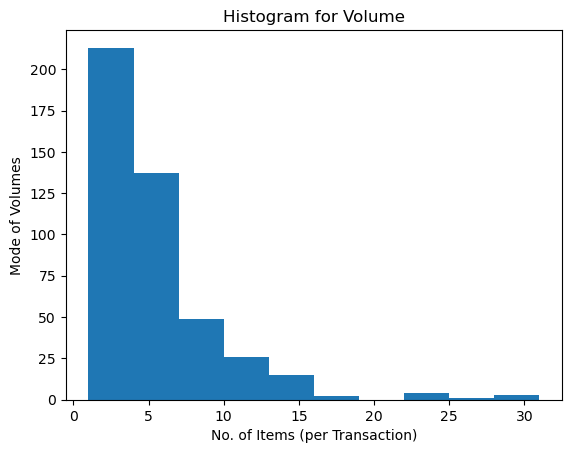

In [83]:
plt.hist(df['Volume'])
plt.xlabel('No. of Items (per Transaction)')
plt.ylabel('Mode of Volumes')
plt.title('Histogram for Volume')
plt.show()

##### Volume:
* Majority of the transaction involve smaller volumns, which indicates that the business deals with wide range of products.
* The histogram appears to be skewed to the right, with a majority of transactions having lower volumes.

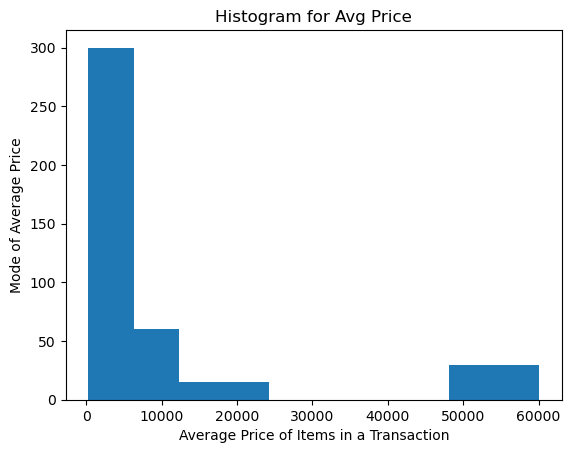

In [84]:
plt.hist(df['Avg Price'])
plt.xlabel('Average Price of Items in a Transaction')
plt.ylabel('Mode of Average Price')
plt.title('Histogram for Avg Price')
plt.show()

##### Average Price:
* Majority of the transactions involve items with lower average prices, which might indicate that the business deals with wide range of products, of which lower priced products are most frequently bought.
* The Histogram appears to be heavily skewed to the right, with a majority of transactions having lower average prices and fewer transactions with higher average prices.

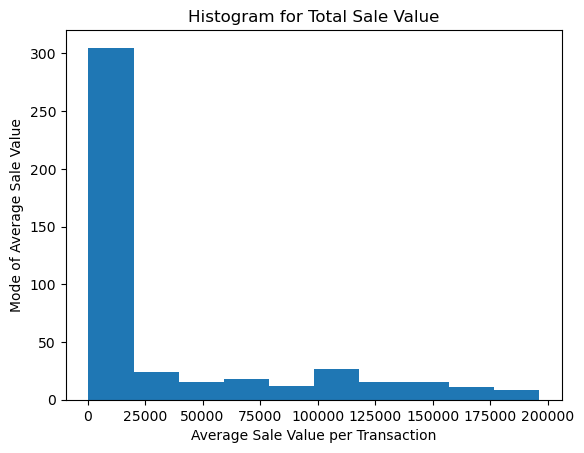

In [85]:
plt.hist(df['Total Sales Value'])
plt.xlabel('Average Sale Value per Transaction')
plt.ylabel('Mode of Average Sale Value')
plt.title('Histogram for Total Sale Value')
plt.show()

##### Total Sale Value:
* Majority of Transactions involve lower total sales value, which might indicate that the business deals majorly deals with lower priced products.
* The histogram appears to be skewed to the right, with a majority of transactions having lower total sales values and fewer transactions with higher total sales values.

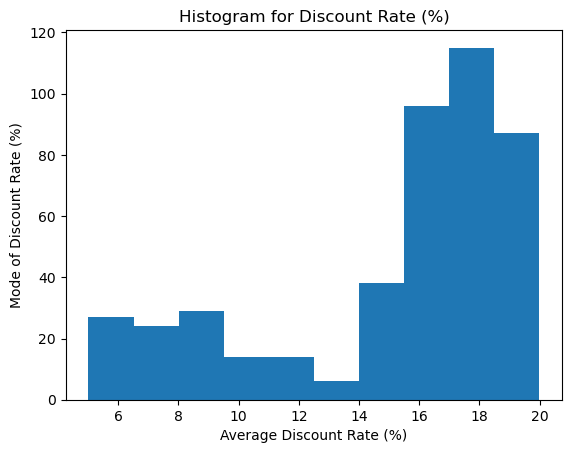

In [86]:
plt.hist(df['Discount Rate (%)'])
plt.xlabel('Average Discount Rate (%)')
plt.ylabel('Mode of Discount Rate (%)')
plt.title('Histogram for Discount Rate (%)')
plt.show()

##### Discount Rate (%):
* There is a diversity in the discount rates applied across transactions, with some transactions receiving lower discounts and others receiving higher discounts.
* The histogram appears to be skewed to the left, with majority of the transactions having higher discount rate while a significant number of transactions having lower discount rates.

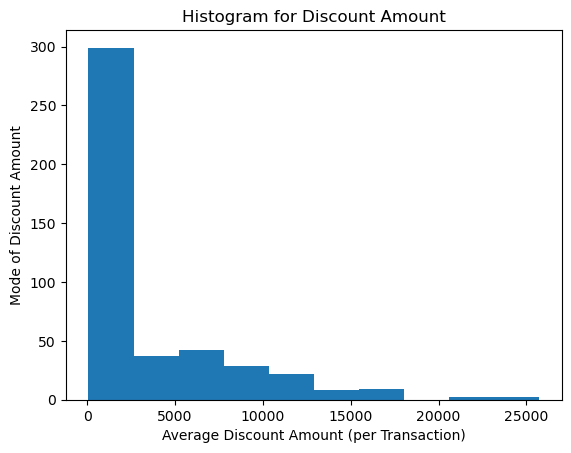

In [87]:
plt.hist(df['Discount Amount'])
plt.xlabel('Average Discount Amount (per Transaction)')
plt.ylabel('Mode of Discount Amount')
plt.title('Histogram for Discount Amount')
plt.show()

##### Discount Amount:
* Majority of transactions involve smaller discount amounts, which might indicate that the business applies discounts conservatively and customers typically receive smaller discounts even after having higher discount rates.
* The histogram appears to be skewed to the right, with majority of transactions having lower discount amounts and fewer transactions with higher discount amounts.

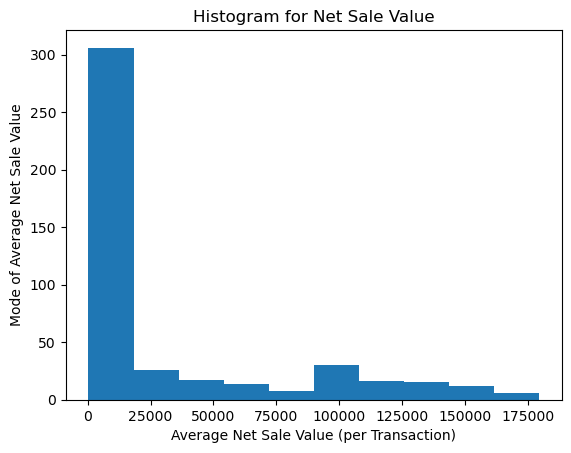

In [88]:
plt.hist(df['Net Sales Value'])
plt.xlabel('Average Net Sale Value (per Transaction)')
plt.ylabel('Mode of Average Net Sale Value')
plt.title('Histogram for Net Sale Value')
plt.show()

##### Net Sale Value:
* Majority of Transactions result in lower net sales values, which might indicate that the business deals with a mix of products with varying profitability.
* The histogram appears to be heavily skewed to the right, this suggests that most transactions result in lower net sales values, while fewer transactions result in higher net sales values.

#### Boxplots:
* 	Create boxplots for numerical variables to identify outliers and the interquartile range.
* 	Discuss any findings, such as extreme values or unusual distributions.

In [89]:
import seaborn as sns

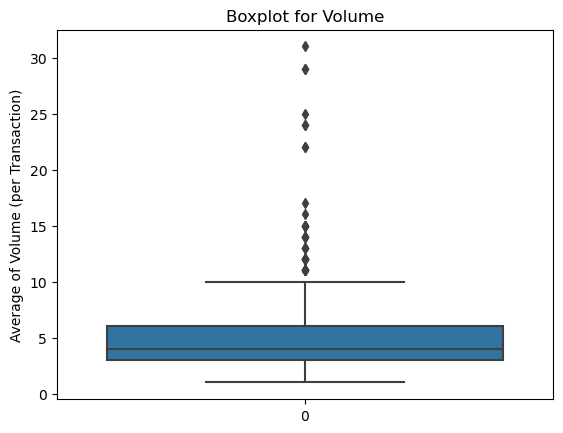

Interquartile Range (IQR): 3.0


In [90]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Volume'])
plt.ylabel('Average of Volume (per Transaction)')
plt.title('Boxplot for Volume')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Volume'].quantile(0.25)
q3 = df['Volume'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference:
* IQR is relatively small (3 units), it indicates that the middle 50% of the data points from Q1 to Q3 are relatively tightly clustered around the median.
* Small IQR suggests that there is not much variability in the volume of items sold per transactions.
* Most transactions likely involve a similar number of items, contributing to a more consistent volume pattern.
* Data Points lying beyound the whiskers of the boxplot may be considered as potential outliers. These outliers represent transactions with unusually high or low volumes compared to the majority of transactions.

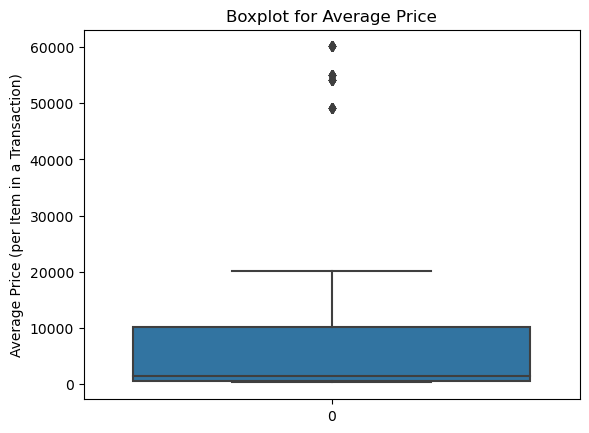

Interquartile Range (IQR): 9635.0


In [91]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Avg Price'])
plt.ylabel('Average Price (per Item in a Transaction)')
plt.title('Boxplot for Average Price')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Avg Price'].quantile(0.25)
q3 = df['Avg Price'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference:
* Wide Range of average prices suggests that the business may deal with products that vary greatly in price.
* The IQR suggests significant variability in the average prices of items sold per transaction.
* Data Points lying beyond the whiskers of the boxplot may be considered as potential outlies. These outliers could represent transactions with unusually high average prices compared to the majority of transactions.

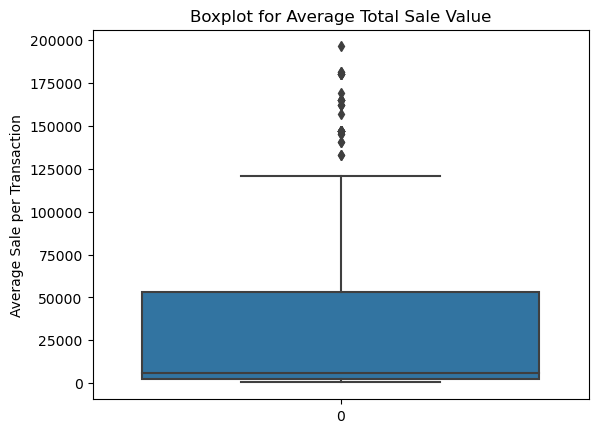

Interquartile Range (IQR): 50500.0


In [92]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Total Sales Value'])
plt.ylabel('Average Sale per Transaction')
plt.title('Boxplot for Average Total Sale Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Total Sales Value'].quantile(0.25)
q3 = df['Total Sales Value'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference
* Similar to the Average Price, the substantial IQR indicates that there is considerable variability in the toal sales values per transaction. This variability suggests that transactions involve a diverse range of sales values.
* Data points lying beyond whiskers may be potential outliers and could represent transactions with unusually high sales values compared to the majority of transactions.

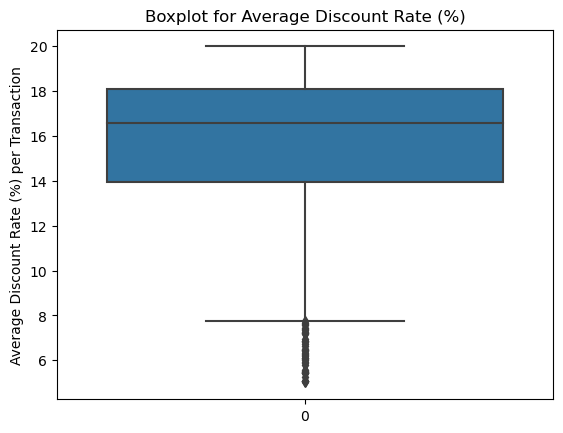

Interquartile Range (IQR): 4.149655934050962


In [93]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Discount Rate (%)'])
plt.ylabel('Average Discount Rate (%) per Transaction')
plt.title('Boxplot for Average Discount Rate (%)')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Discount Rate (%)'].quantile(0.25)
q3 = df['Discount Rate (%)'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference
* Small IQR indicates that there is not much variability in the discount rates applied across transactions. This suggests that the discount rates tend to be relatively consistent across transactions.
* Small IQR suggests that the range of discount rates applied in transactions is relatively narrow, indicating that the business may have standardized discounting practices.
* Outliers could represent transactions with unusually high discount rates compared to the majority of transactions.

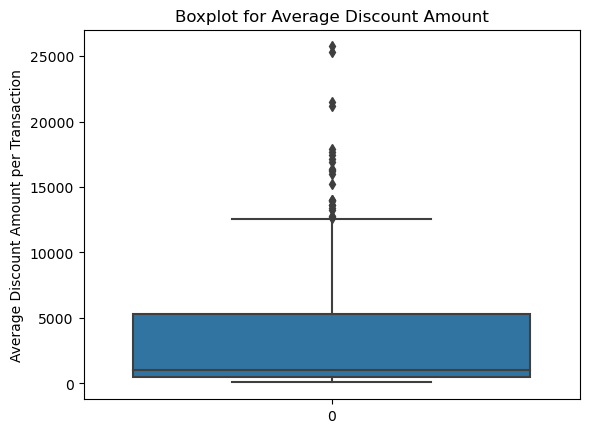

Interquartile Range (IQR): 4856.03612280112


In [94]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Discount Amount'])
plt.ylabel('Average Discount Amount per Transaction')
plt.title('Boxplot for Average Discount Amount')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Discount Amount'].quantile(0.25)
q3 = df['Discount Amount'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference
* IQR suggests that the range of discount amounts applied in transactions is relatively wide, indicating that the business may apply discounts of varying magnitudes.
* Since, the Discount Rates are consistent, the variability in the discount amount suggests that transactions involve a diverse range of discount amount.

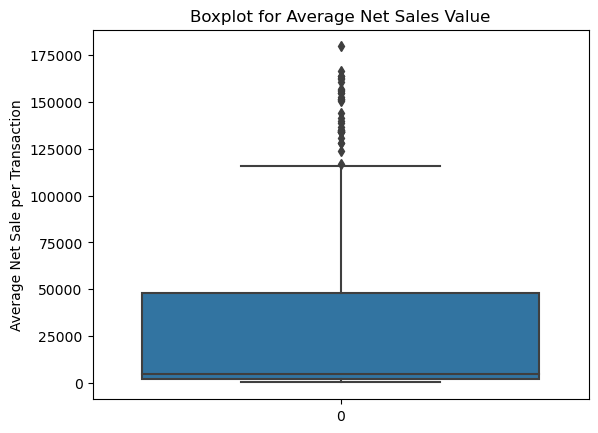

Interquartile Range (IQR): 45645.70420627015


In [95]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Net Sales Value'])
plt.ylabel('Average Net Sale per Transaction')
plt.title('Boxplot for Average Net Sales Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Net Sales Value'].quantile(0.25)
q3 = df['Net Sales Value'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

##### Inference:
* IQR suggest considerable variablity in the net sales values per transaction.
* Net Sales values per transaction is relatively wide, indicating that the business may have transactions of varying monetary amounts.

In [96]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

#### Bar Chart Analysis for Categorical Column:
* 	Identify categorical columns in the dataset.
* 	Create bar charts to visualize the frequency or count of each category.
* 	Analyze the distribution of categories and provide insights.

In [97]:
catcol = df.select_dtypes(include=['object'])
catcol

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


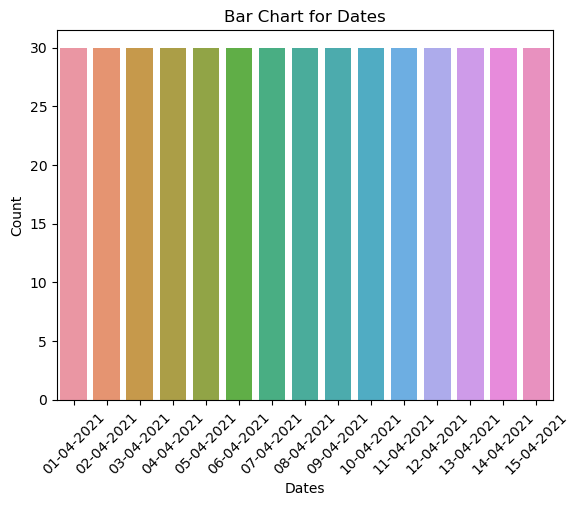

In [98]:
sns.barplot(y=df['Date'].value_counts(), x=df['Date'].unique())
plt.xlabel('Dates')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Chart for Dates')
plt.show()

##### Inference:
* Dataset has consistent number of records for all the dates avaliable.

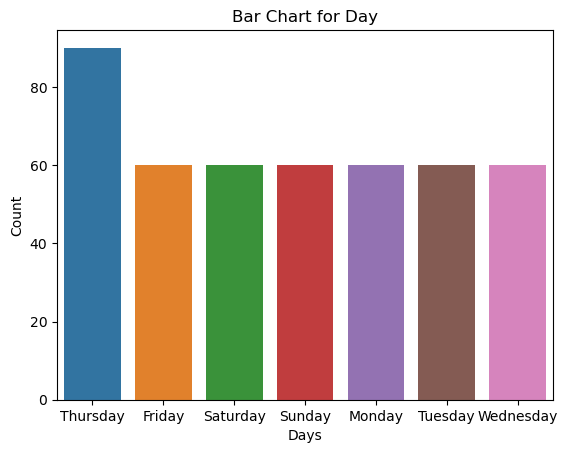

In [99]:
sns.barplot(y=df['Day'].value_counts(), x=df['Day'].unique())
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bar Chart for Day')
plt.show()

##### Inference
* Thursday has the most occurance where as all the other days appears to have consistent records.

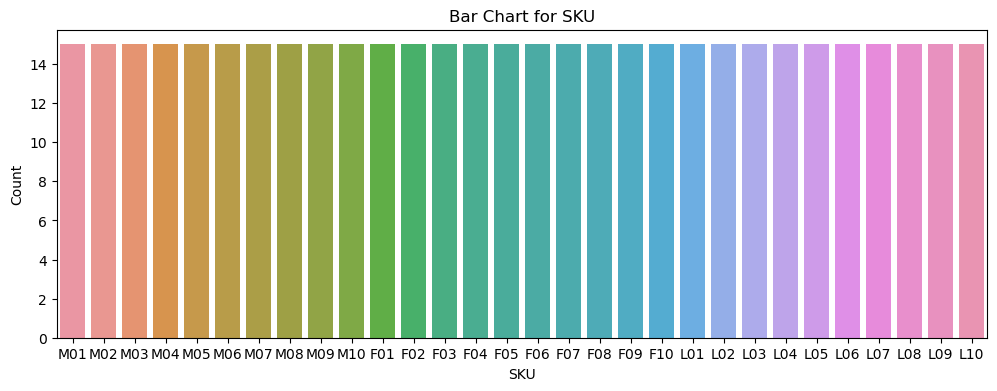

In [100]:
plt.figure(figsize=(12,4))
sns.barplot(y=df['SKU'].value_counts(), x=df['SKU'].unique())
plt.xlabel('SKU')
plt.ylabel('Count')
plt.title('Bar Chart for SKU')
plt.show()

##### Inference
* Dataset appears to be well balanced for all the products in the dataset, with equal number of records for each product.

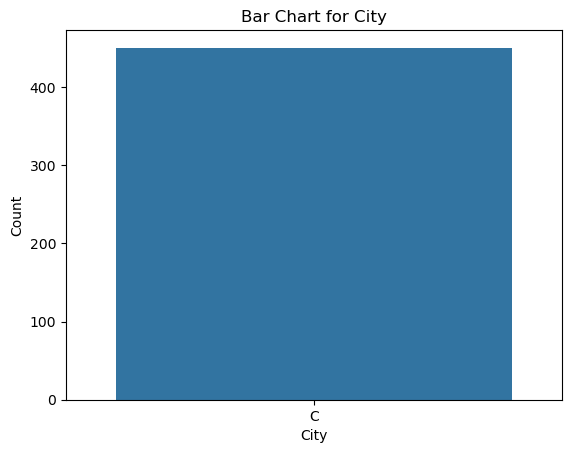

In [101]:
sns.barplot(y=df['City'].value_counts(), x=df['City'].unique())
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bar Chart for City')
plt.show()

##### Inference
* All the records available in the dataset, appears to be from the same city.

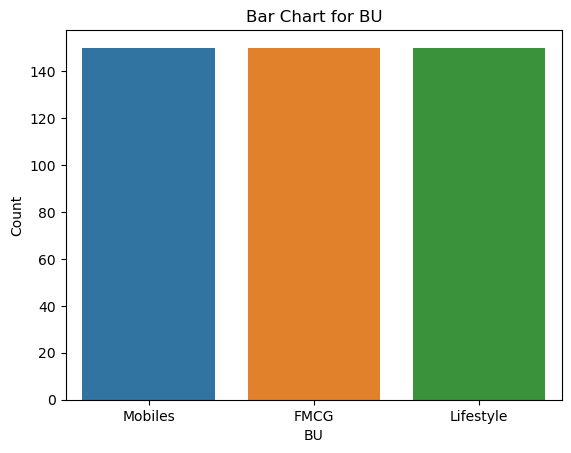

In [102]:
sns.barplot(y=df['BU'].value_counts(), x=df['BU'].unique())
plt.xlabel('BU')
plt.ylabel('Count')
plt.title('Bar Chart for BU')
plt.show()

##### Inference
* Business appears to be dealing with products across three categories.
* Records from all the three categories are consistent with equal number of records.

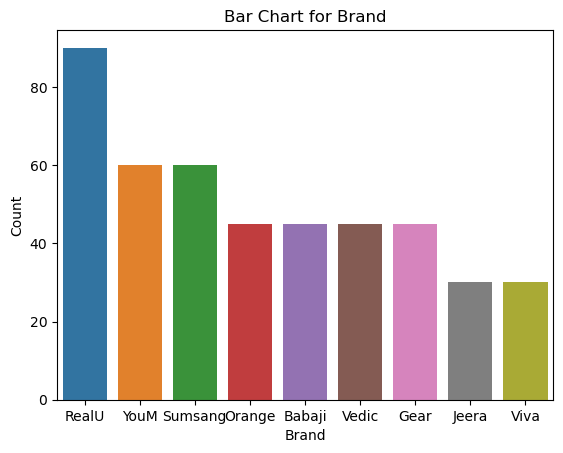

In [103]:
sns.barplot(y=df['Brand'].value_counts(), x=df['Brand'].unique())
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Bar Chart for Brand')
plt.show()

##### Inference
* Business has a variety of brands on offer, out of which RealU happens to be most frequently sold brand, followed by YouM and Sumsang.
* Jeera and Viva are the least sold brands across the catalog.

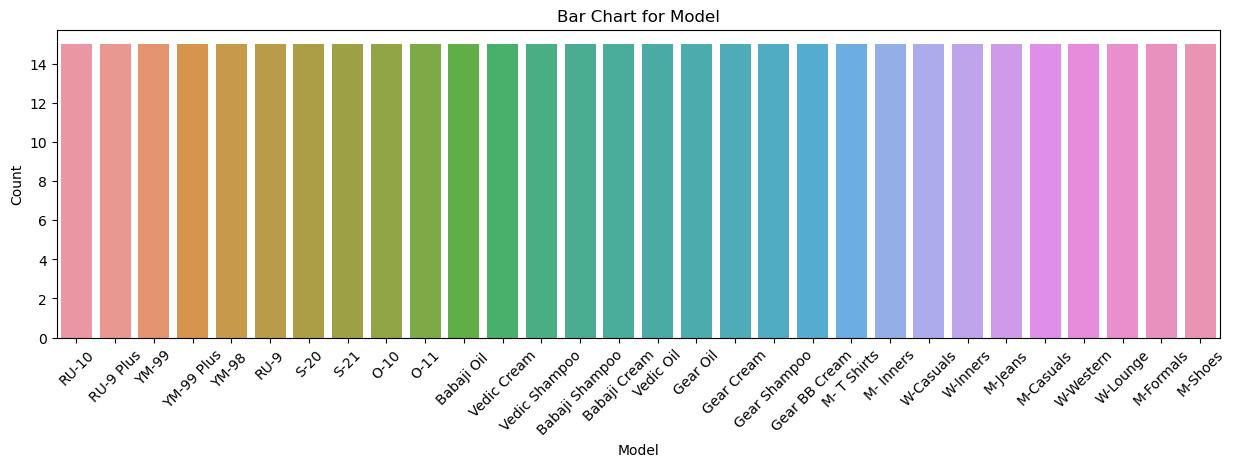

In [104]:
plt.figure(figsize=(15,4))
sns.barplot(y=df['Model'].value_counts(), x=df['Model'].unique())
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Chart for Model')
plt.show()

##### Inference
* Business has a wide range of Products in its catalog and dataset seems to be a balanced with each model has equal number of Records.

## Standardization of Numerical Variables

### Objective:
* To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

#### Step 1: 	Explain the concept of standardization (z-score normalization).

##### Explain the concept of standardization (z-score normalization).

Standardization, also known as z-score normalization, is a preprocessing technique used in statistics and machine learning to rescale numerical data to have a mean of 0 and a standard deviation of 1. It involves transforming the data distribution such that it has a mean of zero and a standard deviation of one, allowing foreasier comparison and interpretations of data across different scales.

#### Step 2: 	Standardize the numerical columns using the formula: z=x-mu/sigma

In [105]:
mean = numcol.mean()
stddev = numcol.std()

standardized_df = (numcol - mean) / stddev

#### Step 3: Show before and after comparisons of the data distributions.

In [106]:
print(f'Original Numerical Columns:')
display(numcol.head())

print(f'Standardized Numerical Columns:')
display(standardized_df.head())

Original Numerical Columns:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


Standardized Numerical Columns:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


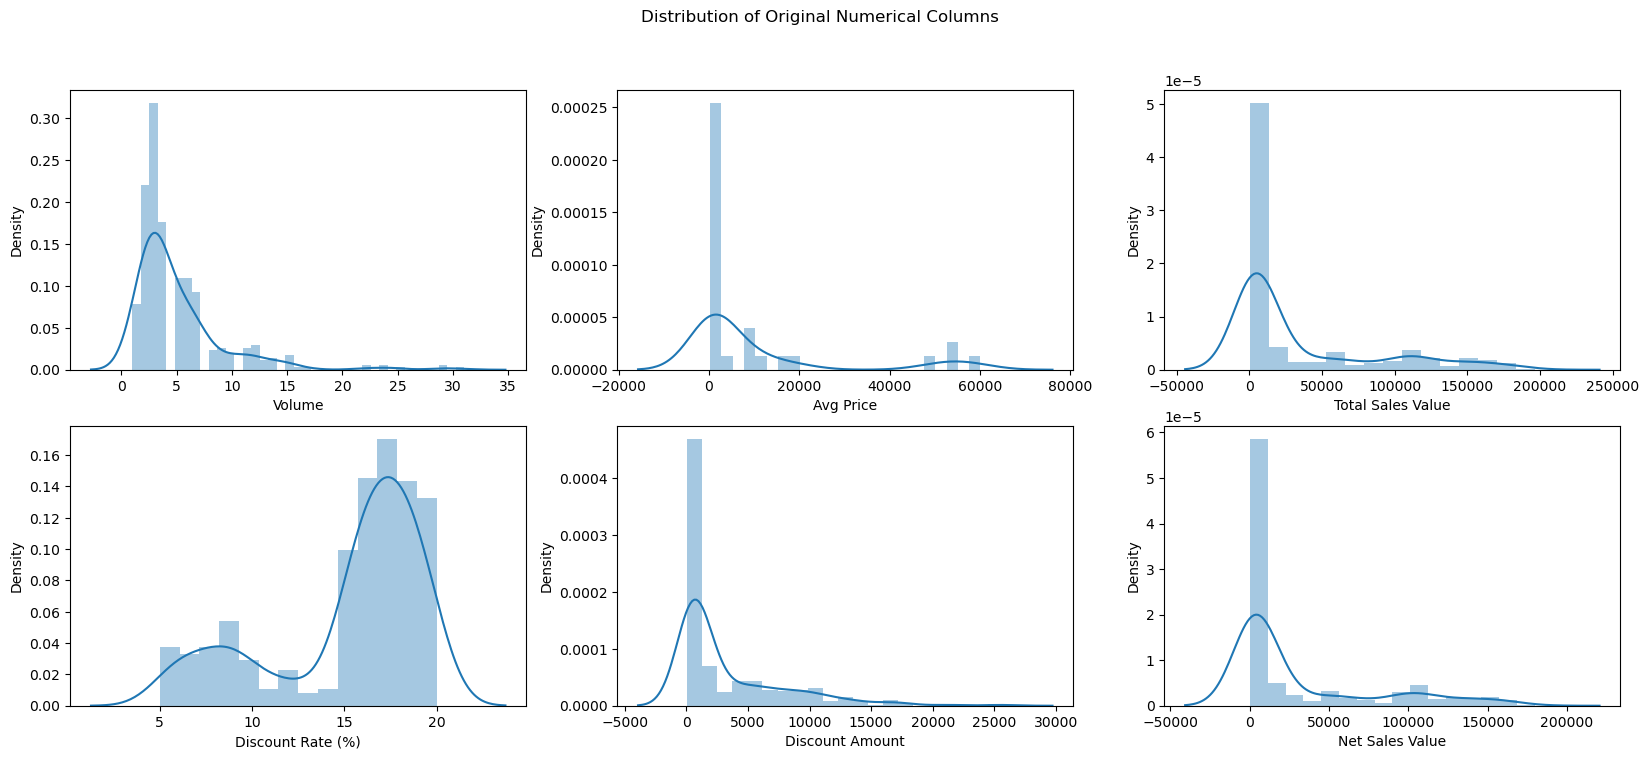

In [107]:
fig, axs = plt.subplots(2,3, figsize=(20,8))
sns.distplot(numcol['Volume'], ax=axs[0,0])
sns.distplot(numcol['Avg Price'], ax=axs[0,1])
sns.distplot(numcol['Total Sales Value'], ax=axs[0,2])
sns.distplot(numcol['Discount Rate (%)'], ax=axs[1,0])
sns.distplot(numcol['Discount Amount'], ax=axs[1,1])
sns.distplot(numcol['Net Sales Value'], ax=axs[1,2])
plt.suptitle('Distribution of Original Numerical Columns')
plt.show()

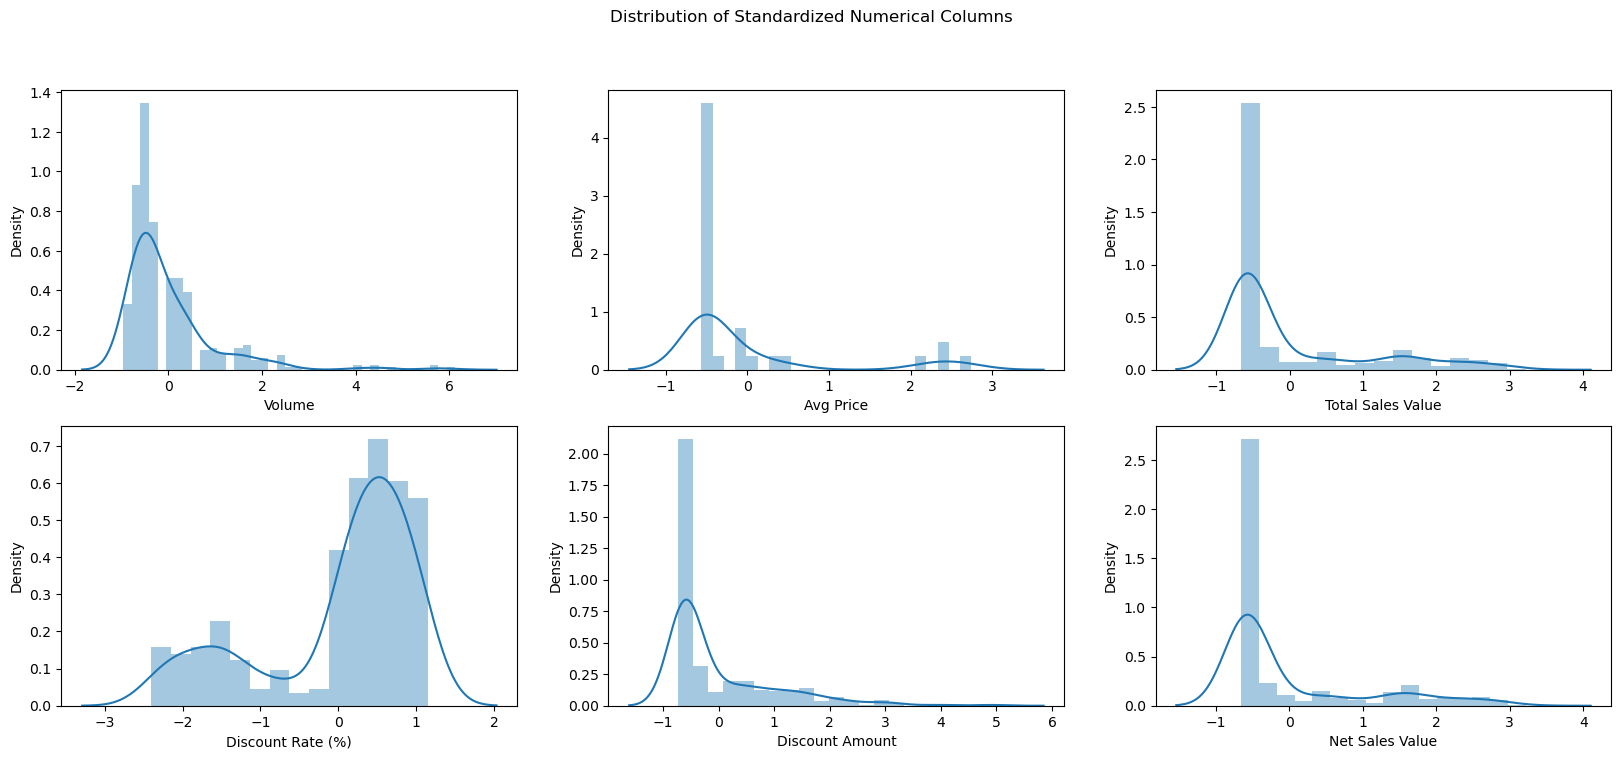

In [108]:
fig, axs = plt.subplots(2,3, figsize=(20,8))
sns.distplot(standardized_df['Volume'], ax=axs[0,0])
sns.distplot(standardized_df['Avg Price'], ax=axs[0,1])
sns.distplot(standardized_df['Total Sales Value'], ax=axs[0,2])
sns.distplot(standardized_df['Discount Rate (%)'], ax=axs[1,0])
sns.distplot(standardized_df['Discount Amount'], ax=axs[1,1])
sns.distplot(standardized_df['Net Sales Value'], ax=axs[1,2])
plt.suptitle('Distribution of Standardized Numerical Columns')
plt.show()

Standardizing the Numerical Columns made the data scale free without affecting the distribution of the Data.

## Conversion of Categorical Data into Dummy Variables

### Objectives:
* To transform categorical variables into a format that can be provided to ML algorithms.

#### Step 1: 	Discuss the need for converting categorical data into dummy variables (one-hot encoding).

Converting Categorical data into dummy variables (one-hot encoding) is necessary to ensure compatibility with machine learning algorithms, prevent ordinal interpretation, avoid bias, maintain independence between categories, and handle categorical variables with multiple categories effectively. It is a fundamental preprocessing step in data preparation for machine learning tasks.

#### Step 2: 	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category. 	Display a portion of the transformed dataset.

In [109]:
transformed_df = pd.get_dummies(catcol.iloc[:,1:], dtype="int64")
transformed_df.head()

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Conclusion

### 1. Summarize the key findings from the descriptive analytics and data visualizations.

* Majority of transactions involve items smaller volumes, indicating a wide range of products being sold.
* Most of the Transactions involve items with lower average prices, suggesting a diverse range of products with varying price points.
* Significant number of Transactions involve lower total sales values, indicating a mix of products with varying sales performance.
* There is a diversity in discount rates applied, with some transactions receiving lower discounts and others higher discount.
* Though there is a variability in discounts, majority of transactions involve smaller discount amounts, suggesting conservative discounting practices.

### 2. Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

Data Preprocessing steps like standardization and one-hot encoding are essential for preparing data for analysis and machine learning tasks. They ensure that data is in a suitable format for model training, it helps improving model performance, handling different scales and types of data, preventing bias, and enhance the interpretability of models, leading to more accurate and reliable results.